# Learning Scikit-learn: Machine Learning in Python

## IPython Notebook for Chapter 3: Unsupervised Learning - Principal Component Analysis

_Principal Component Analysis (PCA) is useful for exploratory data analysis before building predictive models.
For our learning methods, PCA will allow us to reduce a high-dimensional space into a low-dimensional one while preserving as much variance as possible. We will use the handwritten digits recognition problem to show how it can be used_

Start by importing numpy, scikit-learn, and pyplot, the Python libraries we will be using in this chapter. Show the versions we will be using (in case you have problems running the notebooks).

In [1]:
%pylab inline
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sk.__version__)
print ('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
IPython version: 6.1.0
numpy version: 1.13.1
scikit-learn version: 0.18.2
matplotlib version: 2.0.2


Import the digits dataset (http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) and show its attributes

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target
print (digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


Let's show how the digits look...

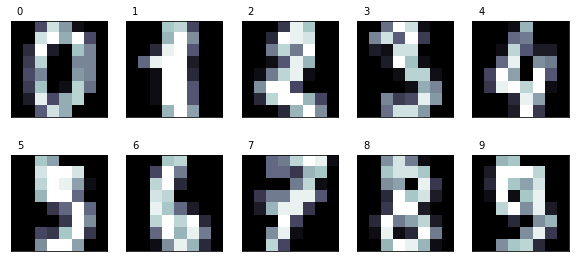

In [3]:
n_row, n_col = 2, 5

def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # label the image with the target value
        p.text(0, -1, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)

Now, let's define a function that will plot a scatter with the two-dimensional points that will be obtained by a PCA transformation. Our data points will also be coloured according to their classes. Recall that the target class will not be used to perform the transformation; we want to investigate if the distribution after PCA reveals the distribution of the different classes, and if they are clearly separable. We will use ten different colors for each of the digits, from 0 to 9.
Find components and plot first and second components

In [4]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

At this point, we are ready to perform the PCA transformation. In scikit-learn, PCA is implemented as a transformer object that learns n number of components through the fit method, and can be used on new data to project it onto these components. In scikit-learn, we have various classes that implement different kinds of PCA decompositions. In our case, we will work with the PCA class from the sklearn.decomposition module. The most important parameter we can change is n_components, which allows us to specify the number of features that the obtained instances will have.

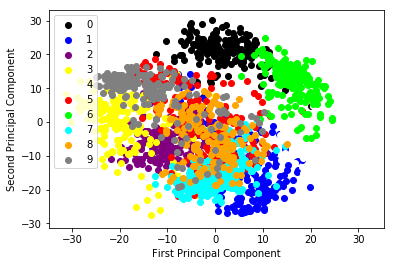

In [5]:
from sklearn.decomposition import PCA

n_components = n_row * n_col # 10
estimator = PCA(n_components=n_components)
X_pca = estimator.fit_transform(X_digits)
plot_pca_scatter() # Note that we only plot the first and second principal component

To finish, let us look at principal component transformations. We will take the principal components from the estimator by accessing the components attribute. Each of its components is a matrix that is used to transform a vector from the original space to the transformed space. In the scatter we previously plotted, we only considered the top two components, but here we'll render them all.

In [11]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        #print(comp)
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((8, 8)), interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())

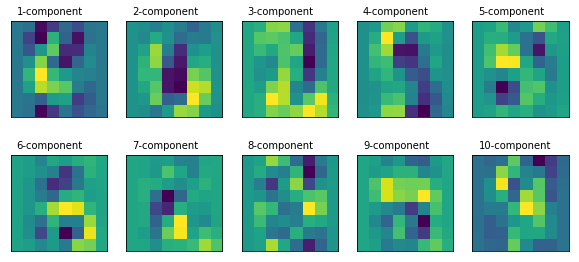

In [12]:
print_pca_components(estimator.components_[:n_components], n_col, n_row)